<a href="https://colab.research.google.com/github/muhammed-oztel/CSE4088_ML_Term_Project/blob/main/project_figured.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
import pandas as pd


In [60]:
data = load_breast_cancer()
X, y = data.data, data.target
sc = StandardScaler()
data_std = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(data_std, y, test_size = 0.3, random_state=0)


scores = []


In [34]:
import warnings
warnings.simplefilter('ignore')

In [10]:
def display_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    return cm_display

    

In [68]:
def display_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    return cm_display


# Perceptron Learning Algorithm

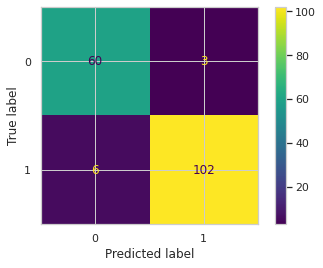

In [61]:
perceptron_classifier = Perceptron()
perceptron_score = round(np.mean(cross_val_score(perceptron_classifier, data_std, y=y, scoring='f1_micro', cv=10))*100,2)
scores.append(perceptron_score)

perceptron_classifier.fit(X_train, y_train)
perceptron_classifier.score(X, y)
y_pred = perceptron_classifier.predict(X_test)
cm = display_cm(y_test, y_pred)


# Logistic Regressieon


linelinear_reg_score

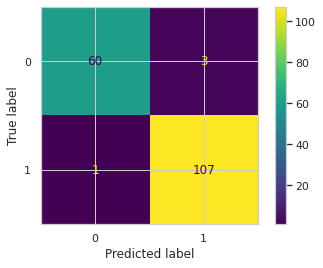

In [62]:
log_reg_classifier = LogisticRegression()
log_reg_score = round(np.mean(cross_val_score(log_reg_classifier, data_std, y=y, scoring='f1_micro', cv=10))*100,2)
scores.append(log_reg_score)
log_reg_score

log_reg_classifier.fit(X_train, y_train)
log_reg_classifier.score(X, y)
y_pred = log_reg_classifier.predict(X_test)
cm = display_cm(y_test, y_pred)

# SVM - Neural Network

<h3>Linear Kernel</h3k

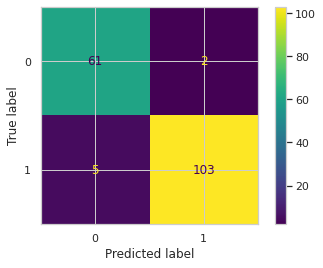

In [63]:
rbf_svm_classifier = SVC(kernel = 'linear', random_state = 0)
rbf_svm_score = round(np.mean(cross_val_score(rbf_svm_classifier, data_std, y=y, scoring='f1_micro', cv=10))*100,2)
scores.append(rbf_svm_score)


rbf_svm_classifier.fit(X_train, y_train)
rbf_svm_classifier.score(X, y)
y_pred = rbf_svm_classifier.predict(X_test)
cm = display_cm(y_test, y_pred)

<h3>RBF Kernel</h3>



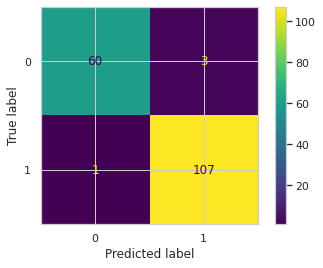

In [64]:
rbf_svm_classifier = SVC(kernel = 'rbf', random_state = 0)
rbf_svm_score = round(np.mean(cross_val_score(rbf_svm_classifier, data_std, y=y, scoring='f1_micro', cv=10))*100,2)
scores.append(rbf_svm_score)

rbf_svm_classifier.fit(X_train, y_train)
rbf_svm_classifier.score(X, y)
y_pred = rbf_svm_classifier.predict(X_test)
cm = display_cm(y_test, y_pred)


# Decision Tree Classification




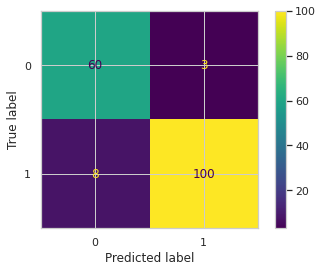

In [65]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_score = round(np.mean(cross_val_score(dt_classifier, data_std, y=y, scoring='f1_micro', cv=10))*100,2)
scores.append(dt_score)

dt_classifier.fit(X_train, y_train)
dt_classifier.score(X, y)
y_pred = dt_classifier.predict(X_test)
cm = display_cm(y_test, y_pred)

# classifier.fit(X_train, Y_train)

In [66]:
scores

[96.12, 98.07, 97.54, 97.71, 93.85]

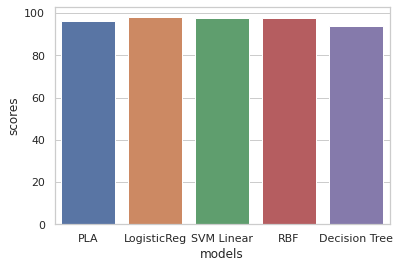

In [67]:
models = [ "PLA", "LogisticReg", "SVM Linear", "RBF", "Decision Tree"]
sns.set_theme(style="whitegrid")
df = pd.DataFrame({'models': models, 'scores': scores})
ax = sns.barplot(x="models", y="scores", data=df)